In [1]:
""" Name: Anay Abhijit Joshi """

# Professor     :   Jun Bai
# Course        :   CS 5173 (Deep Learning)
# Level         :   Undergraduate

# Similar Course: CS 6073 (Deep Learning)

' Name: Anay Abhijit Joshi '

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Any
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, GlobalAveragePooling2D, MaxPooling2D

In [3]:
# Let's start by loading the MNIST dataset and preprocessing it.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the data for the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Resize the images to 32x32
train_images_resized = tf.image.resize(train_images[..., tf.newaxis], (32, 32))
test_images_resized = tf.image.resize(test_images[..., tf.newaxis], (32, 32))

# Convert the images to RGB
train_images_rgb = tf.concat([train_images_resized] * 3, axis=-1)
test_images_rgb = tf.concat([test_images_resized] * 3, axis=-1)

# Now, let's one-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8361 - loss: 0.5292 - val_accuracy: 0.9587 - val_loss: 0.1342
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9509 - loss: 0.1610 - val_accuracy: 0.9677 - val_loss: 0.1051
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9622 - loss: 0.1240 - val_accuracy: 0.9715 - val_loss: 0.0967
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1057 - val_accuracy: 0.9731 - val_loss: 0.0934
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0887 - val_accuracy: 0.9742 - val_loss: 0.0905
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0961


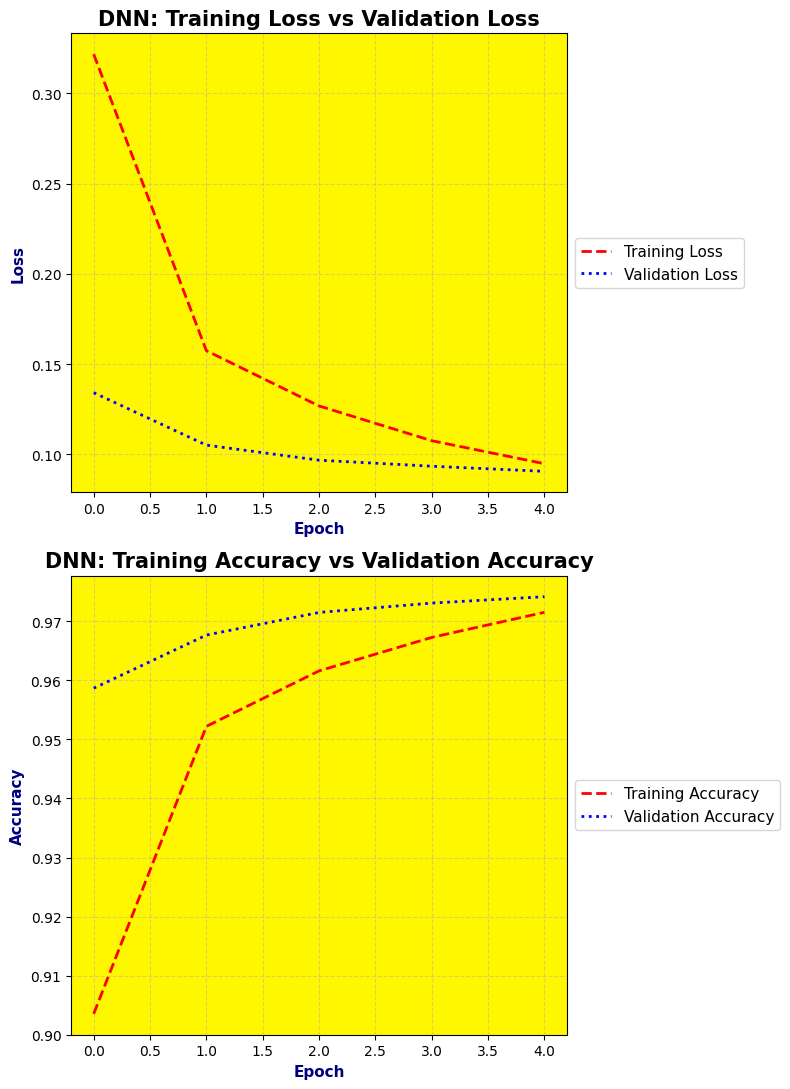



                                    Test Accuracy: DNN = 0.9764000177383423
 
 
                                    Timestamp: 2024-10-05 01:35:12.707767


In [ ]:
# Define the DNN model with Input layer
def create_dnn_model():
    model = Sequential([
        Input(shape=(32, 32, 3)),  # Add Input layer
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training the DNN model
dnn_model = create_dnn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
dnn_history = dnn_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the DNN model
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(test_images_rgb, test_labels)

# Plotting the training history
plt.figure(figsize=(8, 11))

# Training vs validation loss plot
plt.subplot(2, 1, 1)
plt.plot(dnn_history.history['loss'], color="red", linestyle="--", linewidth=2, label='Training Loss')
plt.plot(dnn_history.history['val_loss'], color="blue", linestyle=":", linewidth=2, label='Validation Loss')

# Plot's Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Loss', fontsize=11, color="navy", fontweight="bold")
plt.title('DNN: Training Loss vs Validation Loss', fontsize=15, color="black", fontweight="bold")

# Plot's Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Plot's Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

# Training vs validation accuracy plot
plt.subplot(2, 1, 2)
plt.plot(dnn_history.history['accuracy'], color="red", linestyle="--", linewidth=2, label='Training Accuracy')
plt.plot(dnn_history.history['val_accuracy'], color="blue", linestyle=":", linewidth=2, label='Validation Accuracy')

# Plot's Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Accuracy', fontsize=11, color="navy", fontweight="bold")
plt.title('DNN: Training Accuracy vs Validation Accuracy', fontsize=15, color="black", fontweight="bold")

# Plot's Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Plot's Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


print(f"\n\n                                    Test Accuracy: DNN = {dnn_test_acc}")

# Timestamp
timestamp = datetime.now()
print(f" ")
print(f" ")
print("                                    Timestamp:", timestamp)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8283 - loss: 0.5252 - val_accuracy: 0.9815 - val_loss: 0.0617
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9746 - loss: 0.0845 - val_accuracy: 0.9891 - val_loss: 0.0394
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0602 - val_accuracy: 0.9883 - val_loss: 0.0422
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9898 - val_loss: 0.0359
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0369 - val_accuracy: 0.9904 - val_loss: 0.0347
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0361
 


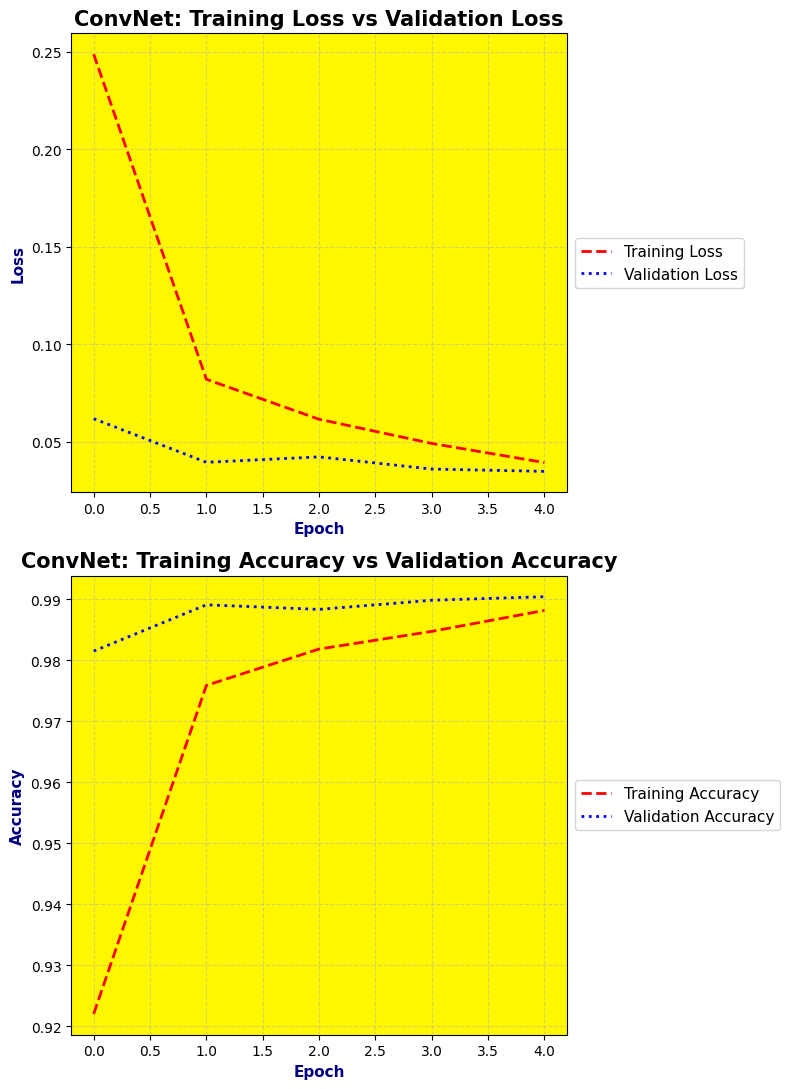



                                    Test Accuracy: ConvNet = 0.9912999868392944
 
 
                                    Timestamp: 2024-10-05 01:36:03.390365


In [ ]:
# Let's create a ConvNet model function
def create_convnet_model():
    # Create a Sequential model
    model = Sequential([
        Input(shape=(32, 32, 3)),  # Add Input layer
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Return the model
    return model

# Create a ConvNet model
convnet_model = create_convnet_model()
# History of the model
convnet_history = convnet_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
convnet_test_loss, convnet_test_acc = convnet_model.evaluate(test_images_rgb, test_labels)

# Plot
# plt.figure()
plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)

# Training Loss and Validation Loss
plt.plot(convnet_history.history['loss'], color="red", linestyle="--", linewidth=2, label='Training Loss')
plt.plot(convnet_history.history['val_loss'], color="blue", linestyle=":", linewidth=2, label='Validation Loss')

# X and Y Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Loss', fontsize=11, color="navy", fontweight="bold")
plt.title('ConvNet: Training Loss vs Validation Loss', fontsize=15, color="black", fontweight="bold")

# Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

plt.subplot(2, 1, 2)

# Training Accuracy and Validation Accuracy
plt.plot(convnet_history.history['accuracy'], color="red", linestyle="--", linewidth=2, label='Training Accuracy')
plt.plot(convnet_history.history['val_accuracy'], color="blue", linestyle=":", linewidth=2, label='Validation Accuracy')

# X and Y Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Accuracy', fontsize=11, color="navy", fontweight="bold")
plt.title('ConvNet: Training Accuracy vs Validation Accuracy', fontsize=15, color="black", fontweight="bold")

# Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

# Adjust the subplot layout
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.tight_layout()
print(" ")
plt.show()

# Print the test accuracy
print(f"\n\n                                    Test Accuracy: ConvNet = {convnet_test_acc}")

# Timestamp
timestamp = datetime.now()
print(f" ")
print(f" ")
print("                                    Timestamp:", timestamp)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 119s 49ms/step - accuracy: 0.8901 - loss: 0.4504 - val_accuracy: 0.8596 - val_loss: 0.4450
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 41ms/step - accuracy: 0.9815 - loss: 0.0826 - val_accuracy: 0.9861 - val_loss: 0.0644
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9744 - loss: 0.1394 - val_accuracy: 0.9059 - val_loss: 0.4380
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9550 - loss: 0.1775 - val_accuracy: 0.9802 - val_loss: 0.0707
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9780 - loss: 0.0948 - val_accuracy: 0.9759 - val_loss: 0.0812
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9734 - loss: 0.0890
 


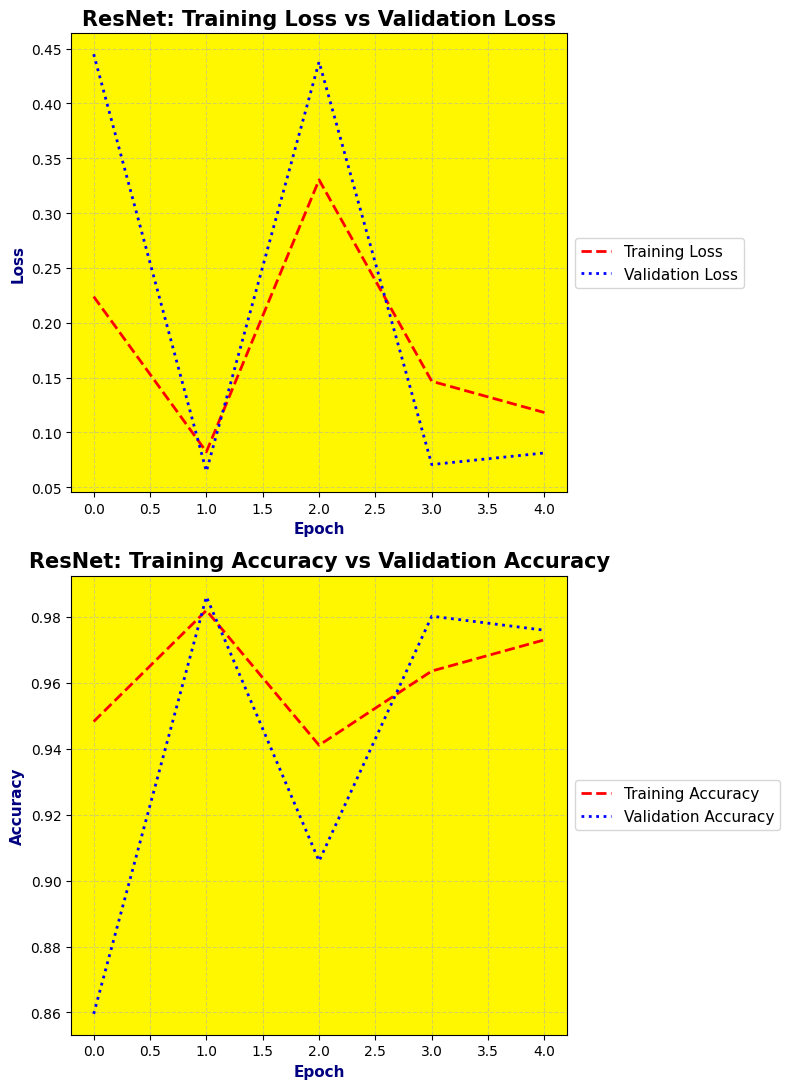



                                    Test Accuracy: ResNet = 0.977400004863739
 
 
                                    Timestamp: 2024-10-05 02:26:20.715407


In [4]:
# Let's begin with the ResNet Model
def create_resnet_model():
    # Load the ResNet50 model
    # I will use the ResNet50 model as a base model and add a few layers on top of it.
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Sequential model, so I can add layers one by one.
    # I will add a GlobalAveragePooling2D layer to reduce the number of parameters.
    # I will add a Dense layer with 128 units and relu activation function.
    # I will add a Dropout layer with a rate of 0.5.
    # I will also add a Dense layer with 10 units and softmax activation function
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    # I will compile the model with the adam optimizer, categorical_crossentropy loss function and accuracy as the metric.
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Now, let's return the model
    return model

# Now, let's have an instance of the ResNet model's function
resnet_model = create_resnet_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5) # Using this line of code again, to make this code block independent.
# History of the model
resnet_history = resnet_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)
# Let's evaluate the model
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images_rgb, test_labels)

# Plot
# plt.figure()
plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)

# Training Loss and Validation Loss
plt.plot(resnet_history.history['loss'], color="red", linestyle="--", linewidth=2, label='Training Loss')
plt.plot(resnet_history.history['val_loss'], color="blue", linestyle=":", linewidth=2, label='Validation Loss')

# X and Y Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Loss', fontsize=11, color="navy", fontweight="bold")
plt.title('ResNet: Training Loss vs Validation Loss', fontsize=15, color="black", fontweight="bold")

# Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

plt.subplot(2, 1, 2)

# Training Accuracy and Validation Accuracy
plt.plot(resnet_history.history['accuracy'], color="red", linestyle="--", linewidth=2, label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], color="blue", linestyle=":", linewidth=2, label='Validation Accuracy')

# X and Y Labels
plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
plt.ylabel('Accuracy', fontsize=11, color="navy", fontweight="bold")
plt.title('ResNet: Training Accuracy vs Validation Accuracy', fontsize=15, color="black", fontweight="bold")

# Legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Grid
plt.grid(True, linestyle="--", alpha=0.5)

# Plot's Background Color
plt.gca().set_facecolor("#FFF700")

# Adjust the subplot layout
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.tight_layout()
print(" ")
plt.show()

# Print the test accuracy
print(f"\n\n                                    Test Accuracy: ResNet = {resnet_test_acc}")

# Timestamp
timestamp = datetime.now()
print(f" ")
print(f" ")
print("                                    Timestamp:", timestamp)

In [ ]:
# Test Model Function
def test_model(*, model_type: str, learning_rate:Any):

    """
    Test a deep learning model with a given model(s) and the learning rate(s).

    -----------
    Function Parameters:
    -----------
    model_type : str
        The type of model to train. Please choose the model type:
        - 'DNN': Deep Neural Network.
        - 'ConvNet': Convolutional Neural Network.
        - 'ResNet': Residual Network.

    learning_rate : Any
        The learning rate to use for the training of the model.

    -----------

    Note:
    -----
    This function uses keyword-only arguments, and all parameters are required.
    """

    # Check if the model_type is a string
    if not isinstance(model_type, str):
        raise TypeError('"model_type" must be a string.')

    # Converting the user input to uppercase to avoid case sensitivity
    model_type = model_type.upper()

    # DNN Model
    if model_type == "DNN":
        def DNN_Model():
            # Sequential model
            model = Sequential([
                Flatten(input_shape=(32, 32, 3)),
                Dense(256, activation='relu'),
                BatchNormalization(),
                Dropout(0.2),
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dropout(0.2),
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dense(10, activation='softmax')
            ])
            # Let's return the model
            return model


        # Instantiate the model
        dnn_model = DNN_Model()
        # Adam optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        # Compile the model
        dnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        # Fit the model
        dnn_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
        # Evaluate the model
        loss, acc = dnn_model.evaluate(test_images_rgb, test_labels, verbose=0)

        print(f"\n                                    Model: DNN")
        # print(f"\n                                    Model: {model_type}")

        # Let's print the Learning Rate
        print(f"                                    Learning Rate = {learning_rate}")
        # Print the test accuracy
        print(f"\n                                    Test Accuracy: {acc}")

        # Timestamp
        timestamp = datetime.now()
        print(f" ")
        print(f" ")
        print("                                    Timestamp:", timestamp)



    # ConvNet Model
    elif model_type == "CONVNET":
        def ConvNet_Model():
            # Sequential model
            model = Sequential([
                Input(shape=(32, 32, 3)),  # Input layer
                Conv2D(32, (3, 3), activation='relu'),
                BatchNormalization(),  # Batch normalization layer
                MaxPooling2D(pool_size=(2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                BatchNormalization(),  # Batch normalization layer
                MaxPooling2D(pool_size=(2, 2)),
                Flatten(),
                Dense(128, activation='relu'),
                BatchNormalization(),  # Batch normalization layer
                Dropout(0.5),
                Dense(10, activation='softmax')
            ])
            # Let's return the model
            return model

        # Instantiate the model
        convnet_model = ConvNet_Model()
        # Adam optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        # Compile the model
        convnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        # Fit the model
        convnet_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
        # Evaluate the model
        convnet_test_loss, convnet_test_acc = convnet_model.evaluate(test_images_rgb, test_labels)

        print(f"\n                                    Model: ConvNet")
        # print(f"\n                                    Model: {model_type}")

        # Let's print the Learning Rate
        print(f"                                    Learning Rate = {learning_rate}")
        # Print the test accuracy
        print(f"\n                                    Test Accuracy: {convnet_test_acc}")

        # Timestamp
        timestamp = datetime.now()
        print(f" ")
        print(f" ")
        print("                                    Timestamp:", timestamp)



    # ResNet Model
    elif model_type == "RESNET":
        def ResNet_Model():
            # ResNet50 Base model
            base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))
            # Sequential model
            model = Sequential([
                base_model,
                GlobalAveragePooling2D(),
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dropout(0.5),
                Dense(10, activation='softmax')
            ])
            # Let's return the model
            return model

        # Instantiate the model
        resnet_model = ResNet_Model()

        # Adam optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        # Compile the model
        resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        # Fit the model
        resnet_model.fit(train_images_rgb, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
        # Evaluate the model
        resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images_rgb, test_labels)

        print(f"\n                                    Model: ResNet")
        # print(f"\n                                    Model: {model_type}")

        # Let's print the Learning Rate
        print(f"                                    Learning Rate = {learning_rate}")
        # Print the test accuracy
        print(f"\n                                    Test Accuracy: {resnet_test_acc}")

        # Timestamp
        timestamp = datetime.now()
        print(f" ")
        print(f" ")
        print("                                    Timestamp:", timestamp)

    else:
        print("\nInvalid Model Type!")
        print('Please enter a valid model type: "DNN", "ConvNet", "ResNet"')

    # return None

In [ ]:
test_model(model_type="DNN", learning_rate=0.1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8123 - loss: 0.6134 - val_accuracy: 0.9393 - val_loss: 0.2172
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9197 - loss: 0.2894 - val_accuracy: 0.9475 - val_loss: 0.2288
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9360 - loss: 0.2360 - val_accuracy: 0.9450 - val_loss: 0.2158
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9410 - loss: 0.2160 - val_accuracy: 0.9538 - val_loss: 0.2023
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9424 - loss: 0.2110 - val_accuracy: 0.9561 - val_loss: 0.2314

                                    Model: DNN
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.955299973487854
 
 
                                    Timestamp: 2024-10-05 00:17:36.250308


In [ ]:
test_model(model_type="DNN", learning_rate=0.01)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8630 - loss: 0.4341 - val_accuracy: 0.9388 - val_loss: 0.2068
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9424 - loss: 0.1867 - val_accuracy: 0.9578 - val_loss: 0.1445
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9538 - loss: 0.1538 - val_accuracy: 0.9643 - val_loss: 0.1151
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9592 - loss: 0.1327 - val_accuracy: 0.9744 - val_loss: 0.0928
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9628 - loss: 0.1191 - val_accuracy: 0.9681 - val_loss: 0.1059

                                    Model: DNN
                                    Learning Rate = 0.01

                                    Test Accuracy: 0.97079998254776
 
 
                                    Timestamp: 2024-10-05 00:18:03.002646


In [ ]:
test_model(model_type="DNN", learning_rate=0.001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.4479 - val_accuracy: 0.9578 - val_loss: 0.1344
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9457 - loss: 0.1722 - val_accuracy: 0.9678 - val_loss: 0.1016
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9590 - loss: 0.1337 - val_accuracy: 0.9704 - val_loss: 0.0922
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9643 - loss: 0.1164 - val_accuracy: 0.9721 - val_loss: 0.0910
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1023 - val_accuracy: 0.9753 - val_loss: 0.0804

                                    Model: DNN
                                    Learning Rate = 0.001

                                    Test Accuracy: 0.9771000146865845
 
 
                                    Timestamp: 2024-10-05 00:18:26.987477


In [ ]:
test_model(model_type="DNN", learning_rate=0.0001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7292 - loss: 0.9021 - val_accuracy: 0.9497 - val_loss: 0.1949
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9318 - loss: 0.2587 - val_accuracy: 0.9624 - val_loss: 0.1367
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9497 - loss: 0.1831 - val_accuracy: 0.9674 - val_loss: 0.1109
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9576 - loss: 0.1489 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9636 - loss: 0.1265 - val_accuracy: 0.9724 - val_loss: 0.0932

                                    Model: DNN
                                    Learning Rate = 0.0001

                                    Test Accuracy: 0.972000002861023
 
 
                                    Timestamp: 2024-10-05 00:18:52.504953


In [ ]:
test_model(model_type="ConvNet", learning_rate=0.1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8452 - loss: 0.7094 - val_accuracy: 0.9703 - val_loss: 0.3415
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9322 - loss: 0.6108 - val_accuracy: 0.9517 - val_loss: 0.6881
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9420 - loss: 0.7348 - val_accuracy: 0.9787 - val_loss: 0.3783
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9596 - loss: 0.6092 - val_accuracy: 0.9751 - val_loss: 0.5178
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9644 - loss: 0.5755 - val_accuracy: 0.9808 - val_loss: 0.5139
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.3596

                                    Model: ConvNet
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.9848999977111816
 
 
                                    Timestamp: 2024-10-05 00:19:26.770770


In [ ]:
test_model(model_type="ConvNet", learning_rate=0.01)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9187 - loss: 0.2667 - val_accuracy: 0.9721 - val_loss: 0.0986
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9744 - loss: 0.0817 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9785 - val_loss: 0.0982
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9824 - loss: 0.0586 - val_accuracy: 0.9623 - val_loss: 0.1433
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9876 - val_loss: 0.0508
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9839 - loss: 0.0521

                                    Model: ConvNet
                                    Learning Rate = 0.01

                                    Test Accuracy: 0.9879999756813049
 
 
                                    Timestamp: 2024-10-05 00:20:01.782726


In [ ]:
test_model(model_type="ConvNet", learning_rate=0.001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9105 - loss: 0.3000 - val_accuracy: 0.9792 - val_loss: 0.0689
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9850 - val_loss: 0.0522
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9853 - loss: 0.0491 - val_accuracy: 0.9872 - val_loss: 0.0423
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9857 - val_loss: 0.0436
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9890 - val_loss: 0.0354
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0379

                                    Model: ConvNet
                                    Learning Rate = 0.001

                                    Test Accuracy: 0.9900000095367432
 
 
                                    Timestamp: 2024-10-05 00:20:35.411561


In [ ]:
test_model(model_type="ConvNet", learning_rate=0.0001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7763 - loss: 0.7543 - val_accuracy: 0.9733 - val_loss: 0.0989
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9586 - loss: 0.1437 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9708 - loss: 0.1003 - val_accuracy: 0.9831 - val_loss: 0.0556
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9778 - loss: 0.0742 - val_accuracy: 0.9846 - val_loss: 0.0493
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9846 - loss: 0.0569 - val_accuracy: 0.9863 - val_loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0462

                                    Model: ConvNet
                                    Learning Rate = 0.0001

                                    Test Accuracy: 0.9872000217437744
 
 
                                    Timestamp: 2024-10-05 00:21:09.121420


In [ ]:
test_model(model_type="ResNet", learning_rate=0.1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 44ms/step - accuracy: 0.5504 - loss: 1.4154 - val_accuracy: 0.4615 - val_loss: 6.8464
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9296 - loss: 0.3266 - val_accuracy: 0.9271 - val_loss: 0.6304
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9389 - loss: 0.3492 - val_accuracy: 0.9733 - val_loss: 0.1531
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9465 - loss: 0.3630 - val_accuracy: 0.3134 - val_loss: 826.2686
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9494 - loss: 0.3874 - val_accuracy: 0.9812 - val_loss: 0.0984
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9774 - loss: 0.1219

                                    Model: ResNet
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.9815999865531921
 
 
                                    Timestamp: 2024-10-05 00:25:07.117024


In [ ]:
test_model(model_type="ResNet", learning_rate=0.01)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6074 - loss: 1.1225 - val_accuracy: 0.9250 - val_loss: 0.2640
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9692 - loss: 0.1146 - val_accuracy: 0.9695 - val_loss: 0.1196
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9792 - loss: 0.0851 - val_accuracy: 0.9753 - val_loss: 0.0970
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9807 - loss: 0.0750 - val_accuracy: 0.8728 - val_loss: 0.6219
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9767 - loss: 0.0883 - val_accuracy: 0.9840 - val_loss: 0.0653
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9839 - loss: 0.0842

                                    Model: ResNet
                                    Learning Rate = 0.01

                                    Test Accuracy: 0.9865999817848206
 
 
                                    Timestamp: 2024-10-05 00:29:12.641778


In [ ]:
test_model(model_type="ResNet", learning_rate=0.001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7841 - loss: 0.7581 - val_accuracy: 0.9688 - val_loss: 0.1078
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.9717 - loss: 0.1046 - val_accuracy: 0.9778 - val_loss: 0.0795
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9806 - loss: 0.0679 - val_accuracy: 0.9450 - val_loss: 0.2038
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9846 - loss: 0.0552 - val_accuracy: 0.9787 - val_loss: 0.0792
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9856 - loss: 0.0557 - val_accuracy: 0.9758 - val_loss: 0.0909
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9701 - loss: 0.1095

                                    Model: ResNet
                                    Learning Rate = 0.001

                                    Test Accuracy: 0.9753000140190125
 
 
                                    Timestamp: 2024-10-05 00:33:46.931214


In [ ]:
test_model(model_type="ResNet", learning_rate=0.0001)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.3838 - loss: 2.1844 - val_accuracy: 0.8558 - val_loss: 0.4471
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.8555 - loss: 0.4622 - val_accuracy: 0.9202 - val_loss: 0.2567
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9278 - loss: 0.2387 - val_accuracy: 0.9417 - val_loss: 0.1872
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.9521 - loss: 0.1585 - val_accuracy: 0.9523 - val_loss: 0.1571
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9662 - loss: 0.1119 - val_accuracy: 0.9614 - val_loss: 0.1351
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9580 - loss: 0.1454

                                    Model: ResNet
                                    Learning Rate = 0.0001

                                    Test Accuracy: 0.9620000123977661
 
 
                                    Timestamp: 2024-10-05 00:37:53.634075


In [5]:
def model_performance(*, model_type: str):
    """
    Train and evaluate a model with different learning rates

    Description:
    ------------
    This function trains the specified model using a set of predefined learning rates. It prints
    out the learning rate, model name, test accuracy, F1 score, and AUC score for each trained model.
    The training process is conducted over 10 epochs with a batch size of 64, and 20% of the training
    data is used for validation.

    The function iterates through multiple learning rates (0.1, 0.01, 0.001, 0.0001) to evaluate
    model performance at each rate. During evaluation, the model's test accuracy, weighted F1 score,
    and AUC score are computed. The results are printed to the console for each learning rate.

    -----------
    Function Parameters:
    -----------
    model_type : str
        The type of model to train. Please choose the model type:
        - 'DNN': Deep Neural Network.
        - 'ConvNet': Convolutional Neural Network.
        - 'ResNet': Residual Network.

    -----------

    Note:
    -----
    This function uses keyword-only arguments, and all parameters are required.
    """

    # Check if the model_type is a string
    if not isinstance(model_type, str):
        raise TypeError('"model_type" must be a string.')

    # Convert the model type to uppercase
    model_type = model_type.upper()
    # Define the model function which is created before
    if model_type == "DNN":
        # Access the function
        model_function = create_dnn_model
        model_name = "DNN"
    elif model_type == "CONVNET":
        # Access the function
        model_function = create_convnet_model
        model_name = "ConvNet"
    elif model_type == "RESNET":
        # Access the function
        model_function = create_resnet_model
        model_name = "ResNet"

    # Different Learning Rates
    learning_rates = [0.1, 0.01, 0.001, 0.0001]
    # Train Data
    train_data = train_images_rgb
    # Test Data
    test_data = test_images_rgb

    # # Print the model type
    # print(f"\n                                    Model: {model_name}")

    # Iterative Loop through the learning rates
    for learning_rate in learning_rates:
        # Access the model's function, defined earlier
        model = model_function()
        # Define the optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        # Compile the model
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        # Fit the model
        model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
        # model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
        # Evaluate the model
        test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=1)

        # Predict the test data
        y_pred = model.predict(test_data)

        # Print the model type
        print(f"\n                                    Model: {model_name}")
        # Let's print the Learning Rate
        print(f"                                    Learning Rate = {learning_rate}")

        # Print the test accuracy
        print(f"\n                                    Test Accuracy: {test_acc}")

        # Calculate the F1 Score
        f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
        # Print the F1 Score
        print(f"                                    F1 Score: {f1}")

        # Calculate the AUC Score
        auc = roc_auc_score(test_labels, y_pred, multi_class='ovr')
        # Print the AUC Score
        print(f"                                    AUC Score: {auc}")
        print(" ")

    # Timestamp
    timestamp = datetime.now()
    print(f" ")
    print(f" ")
    print("                                    Timestamp:", timestamp)

    # return None

In [ ]:
model_performance(model_type="DNN")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1078 - loss: 11.3925 - val_accuracy: 0.1035 - val_loss: 2.3088
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1043 - loss: 2.3371 - val_accuracy: 0.1035 - val_loss: 2.3111
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1031 - loss: 2.3102 - val_accuracy: 0.1060 - val_loss: 2.3067
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1069 - loss: 2.3095 - val_accuracy: 0.1060 - val_loss: 2.3052
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1071 - loss: 2.3102 - val_accuracy: 0.0975 - val_loss: 2.3174
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0921 - loss: 2.3131
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

                                    Model: DNN
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.0957999974489212
                                    F1 Score: 0.0167505749224311
        

In [ ]:
model_performance(model_type="ConvNet")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1081 - loss: 8.0530 - val_accuracy: 0.0997 - val_loss: 2.3062
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1054 - loss: 2.3100 - val_accuracy: 0.1060 - val_loss: 2.3200
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1031 - loss: 2.3104 - val_accuracy: 0.1060 - val_loss: 2.3132
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1081 - loss: 2.3097 - val_accuracy: 0.0956 - val_loss: 2.3093
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1078 - loss: 2.3094 - val_accuracy: 0.0997 - val_loss: 2.3101
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1052 - loss: 2.3066
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

                                    Model: ConvNet
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.10320000350475311
                                    F1 Score: 0.019307904278462656
  

In [6]:
model_performance(model_type="ResNet")

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 75ms/step - accuracy: 0.1052 - loss: 7.7866 - val_accuracy: 0.1035 - val_loss: 2.3090
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.1041 - loss: 2.3074 - val_accuracy: 0.1060 - val_loss: 2.3107
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.1053 - loss: 2.3068 - val_accuracy: 0.1060 - val_loss: 2.3041
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.1039 - loss: 2.3062 - val_accuracy: 0.1060 - val_loss: 2.3064
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.1087 - loss: 2.3060 - val_accuracy: 0.0989 - val_loss: 2.3110
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1044 - loss: 2.3095
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step

                                    Model: ResNet
                                    Learning Rate = 0.1

                                    Test Accuracy: 0.0982000008225441
                                    F1 Score: 0.01756190129

In [ ]:
# Plot training vs validation loss for each model
def plots_training_and_validation_loss(*, model_type: str):
    """
    Plots are for the specified model type.
    1. Training Loss vs Validation Loss
    2. Training Accuracy vs Validation Accuracy

    Description:
    ------------
    This function plots the training and validation loss and accuracy for the specified model type.
    The model type can be 'DNN', 'ConvNet', or 'ResNet'. Based on the model type, it retrieves the
    corresponding training history and plots both the loss and accuracy over epochs.

    The plots are customized with different line styles, colors, labels, and background settings to
    provide a clear and aesthetically pleasing visualization. The training vs. validation loss is
    plotted in the first subplot, and training vs. validation accuracy is plotted in the second subplot.

    Function Parameters:
    --------------------
    model_type : str
        The type of model for which to plot the training history.
        - 'DNN': Deep Neural Network.
        - 'ConvNet': Convolutional Neural Network.
        - 'ResNet': Residual Network.

    Notes:
    ------
    - This function uses a keyword-only argument (`model_type`), and it is required.
    """

    # Check if the model_type is a string
    if not isinstance(model_type, str):
        raise TypeError('"model_type" must be a string.')

    # Convert the model type to uppercase
    model_type = model_type.upper()
    # DNN Model
    if model_type == "DNN":
        history = dnn_history
        title = "DNN Model"
        model_name = "DNN"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    # ConvNet Model
    elif model_type == "CONVNET":
        history = convnet_history
        title = "ConvNet Model"
        model_name = "ConvNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    # ResNet Model
    elif model_type == "RESNET":
        history = resnet_history
        title = "ResNet Model"
        model_name = "ResNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")

    # Plot the Training and Validation Loss, Size of the Figure
    plt.figure(figsize=(8, 11))

    # Subplot
    plt.subplot(2, 1, 1)
    # Plot the Training Loss
    plt.plot(history.history['loss'], color="red", linestyle="--", linewidth=2, label='Training Loss')
    # Plot the Validation Loss
    plt.plot(history.history['val_loss'], color="blue", linestyle=":", linewidth=2, label='Validation Loss')

    # X-axis Label
    plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('Loss', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'{title}: Training Loss vs Validation Loss', fontsize=15, color="black", fontweight="bold")

    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Grid
    plt.grid(True, linestyle="--", alpha=0.5)

    # Background Color
    plt.gca().set_facecolor("#FFF700")

    # Subplot
    plt.subplot(2, 1, 2)
    # Plot the Training Accuracy
    plt.plot(history.history['accuracy'], color="red", linestyle="--", linewidth=2, label='Training Accuracy')
    # Plot the Validation Accuracy
    plt.plot(history.history['val_accuracy'], color="blue", linestyle=":", linewidth=2, label='Validation Accuracy')

    # X-axis Label
    plt.xlabel('Epoch', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('Accuracy', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'{title}: Training Accuracy vs Validation Accuracy', fontsize=15, color="black", fontweight="bold")

    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Grid
    plt.grid(True, linestyle="--", alpha=0.5)

    # Background Color
    plt.gca().set_facecolor("#FFF700")

    # Adjust the Subplots
    plt.subplots_adjust(hspace=0.5)

    plt.tight_layout()
    print(" ")
    # Show the Plot
    plt.show()

    # Timestamp
    timestamp = datetime.now()
    print(f" ")
    print(f" ")
    print("                                    Timestamp:", timestamp)

    # return None


                                    Model: DNN


 


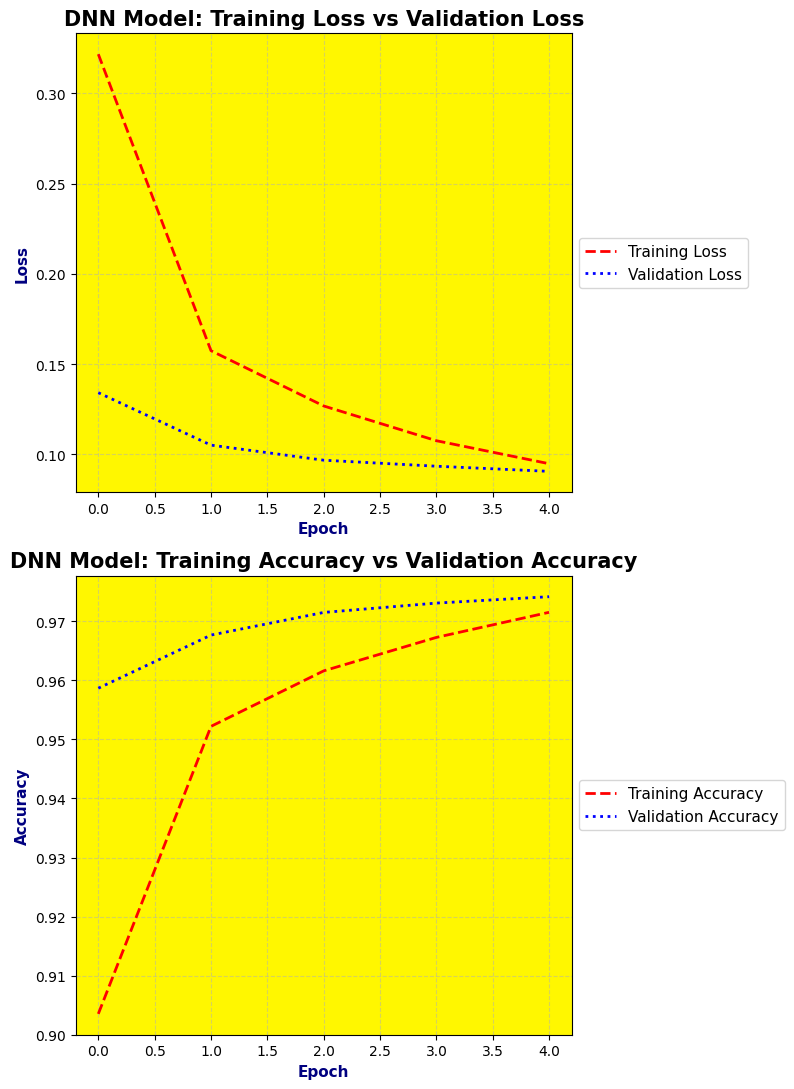

 
 
                                    Timestamp: 2024-10-05 01:41:32.299506


In [ ]:
plots_training_and_validation_loss(model_type="DNN")


                                    Model: ConvNet


 


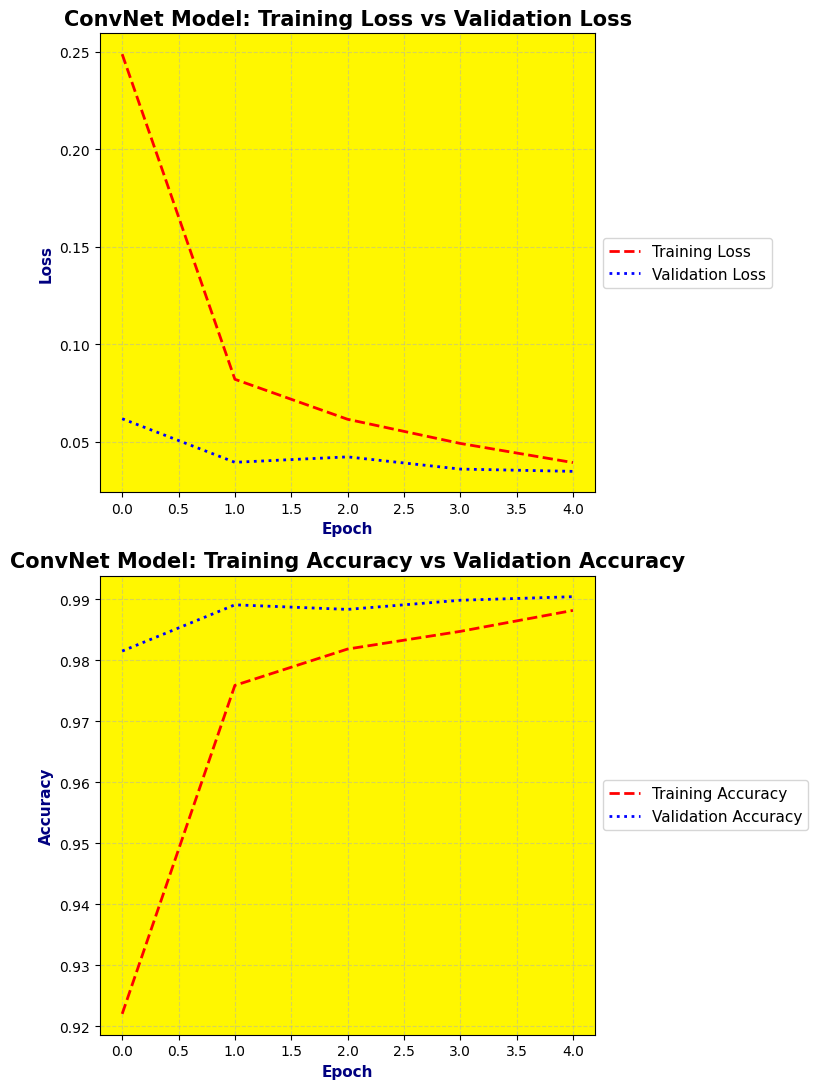

 
 
                                    Timestamp: 2024-10-05 01:41:37.138399


In [ ]:
plots_training_and_validation_loss(model_type="ConvNet")


                                    Model: ResNet


 


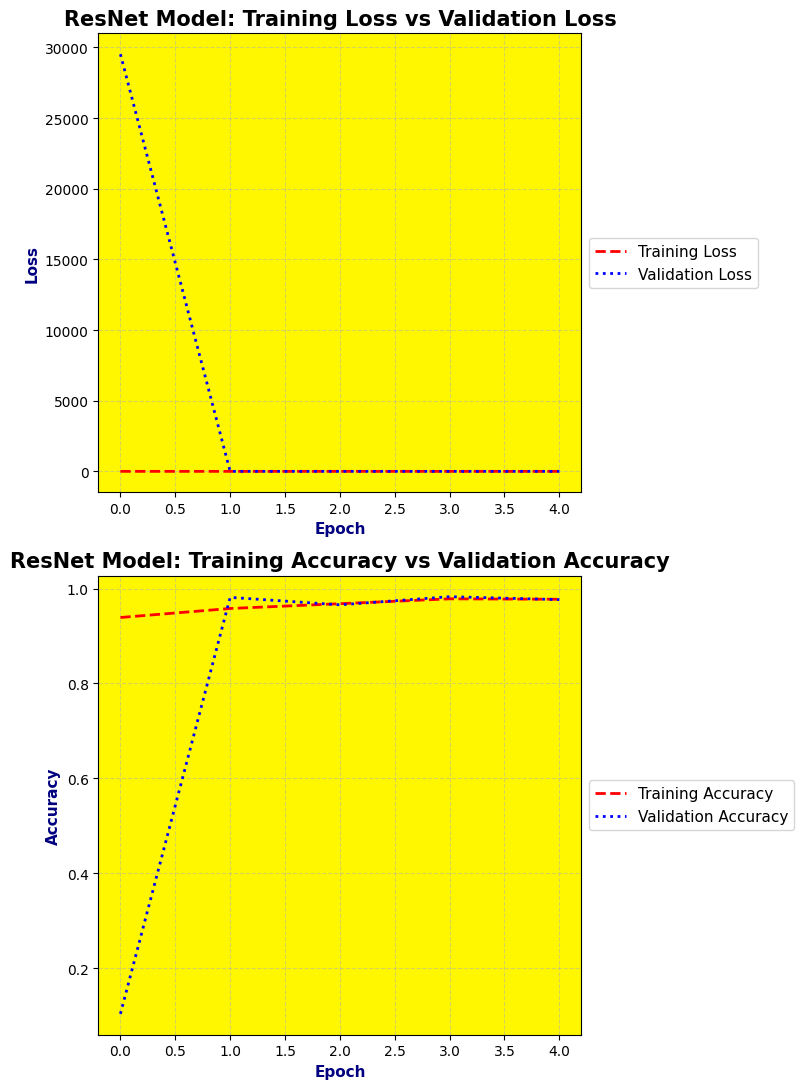

 
 
                                    Timestamp: 2024-10-05 01:41:58.752141


In [ ]:
plots_training_and_validation_loss(model_type="ResNet")

In [ ]:
# Function to plot AUC-ROC curve for a model
def plots_AUC_ROC_curve(*, model_type: str):
    """
    Plot AUC-ROC Curve for the Specified Model Type.

    Description:
    ------------
    This function plots the AUC-ROC curve for the specified model type. The model type can be 'DNN',
    'ConvNet', or 'ResNet'. Based on the model type, it retrieves the corresponding model's predictions
    on the test dataset and computes the Receiver Operating Characteristic (ROC) curves for each digit (0-9)
    as well as the micro-average ROC curve.

    The function calculates the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under
    the Curve (AUC) for each digit and plots them. The micro-average AUC-ROC curve is plotted in the
    first subplot, while the individual AUC-ROC curves for each digit are plotted in the second subplot.

    Function Parameters:
    --------------------
    model_type : str
        The type of model for which to plot the AUC-ROC curve.
        - 'DNN': Deep Neural Network.
        - 'ConvNet': Convolutional Neural Network.
        - 'ResNet': Residual Network.

    Notes:
    ------
    - This function uses a keyword-only argument (`model_type`), and it is required.
    """

    # Check if the model_type is a string
    if not isinstance(model_type, str):
        raise TypeError('"model_type" must be a string.')

    # Convert the model type to uppercase
    model_type = model_type.upper()
    # Assign a title based on model type
    if model_type == "DNN":
        title = "DNN Model"
        # Predict the test images using the DNN model
        y_pred_dnn = dnn_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Assign the predicted labels
        y_pred = y_pred_dnn
        model_name = "DNN"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")

    elif model_type == "CONVNET":
        title = "ConvNet Model"
        # Predict the test images using the ConvNet model
        y_pred_convnet = convnet_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Assign the predicted labels
        y_pred = y_pred_convnet
        model_name = "ConvNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    elif model_type == "RESNET":
        title = "ResNet Model"
        # Predict the test images using the ResNet model
        y_pred_resnet = resnet_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Assign the predicted labels
        y_pred = y_pred_resnet
        model_name = "ResNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    # else:
    #     pass

    # Compute ROC curve and ROC area for each class
    false_positive_rate = dict()
    # True Positive Rate
    true_positive_rate = dict()
    # Area Under the Curve
    roc_auc = dict()

    # For each digital number (0-9)
    for i in range(10):
        # Compute the ROC curve and ROC area for each digital number
        false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        # Compute the Area Under the Curve for each digital number
        roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])

    # Compute micro-average ROC curve and ROC area
    false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    # Compute the Area Under the Curve for the micro-average
    roc_auc["micro"] = auc(false_positive_rate["micro"], true_positive_rate["micro"])

    # Plot the ROC curve
    plt.figure(figsize=(8, 11))

    # Subplot
    plt.subplot(2, 1, 1)
    # Plot the Micro-Average ROC curve
    plt.plot(false_positive_rate["micro"], true_positive_rate["micro"],
             label=f'Micro-Average ROC curve (Area = {roc_auc["micro"]:.4f})',
             color='red', linestyle='--', linewidth=2)
    # X-axis Label
    plt.xlabel('False Positive Rate', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('True Positive Rate', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'{title}: Micro-Average AUC-ROC Curve', fontsize=15, color="black", fontweight="bold")
    # Plot the Diagonal Line
    plt.grid(True, linestyle="--", alpha=0.5)
    # Background Color
    plt.gca().set_facecolor("#FFF700")
    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Now plot ROC curves for each digital number
    plt.subplot(2, 1, 2)

    # Different Dark Colors for each digital number
    different_colors = ['darkslateblue', 'teal', 'indigo', 'darkolivegreen', 'maroon', 'midnightblue', 'saddlebrown', 'darkmagenta', 'darkgreen', 'firebrick']

    # For each digital number (0-9), iterate through the range via a loop
    for i in range(10):
        # Plot the ROC curve for each digital number
        plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2, label=f'Digitial Number: {i} (Area ~ {roc_auc[i]:.4f})', linestyle=':', color=different_colors[i])
    # Plot the Diagonal Line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # X-axis Label
    plt.xlim([0.0, 1.0])
    # Y-axis
    plt.ylim([0.0, 1.05])
    # X-axis Label
    plt.xlabel('False Positive Rate', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('True Positive Rate', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'{title}: AUC-ROC Curve (Digit)', fontsize=15, color="black", fontweight="bold")
    # Grid
    plt.grid(True, linestyle="--", alpha=0.5)
    # Background Color
    plt.gca().set_facecolor("#FFF700")
    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Adjust the Subplots
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    print(" ")
    # Show the Plot
    plt.show()

    # Timestamp
    timestamp = datetime.now()
    print(f" ")
    print(f" ")
    print("                                    Timestamp:", timestamp)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

                                    Model: DNN


 


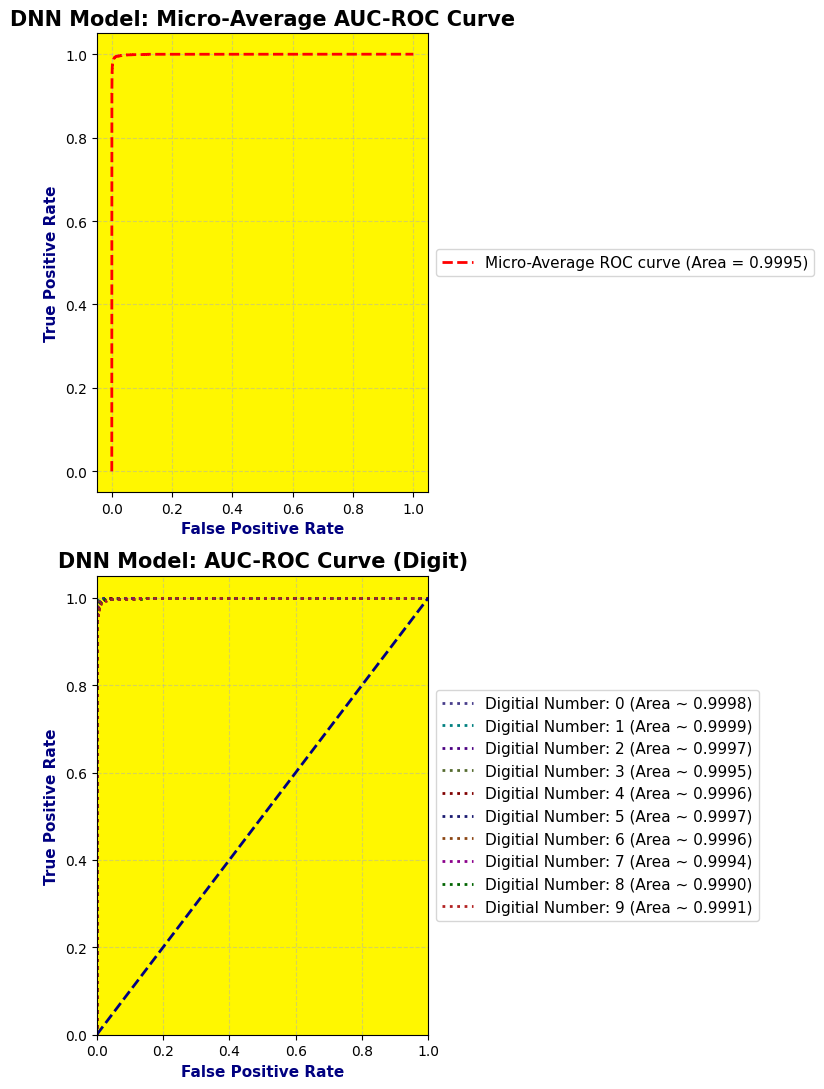

 
 
                                    Timestamp: 2024-10-05 01:42:20.497357


In [ ]:
plots_AUC_ROC_curve(model_type="DNN")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

                                    Model: ConvNet


 


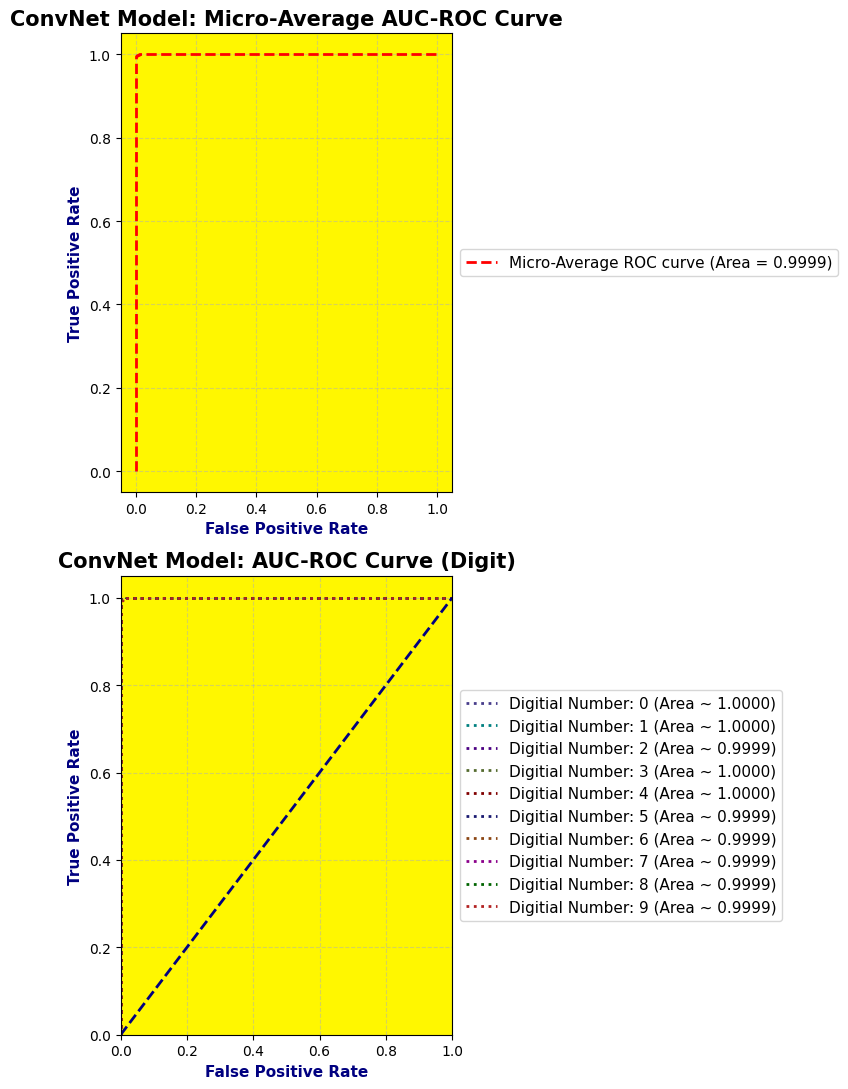

 
 
                                    Timestamp: 2024-10-05 01:42:31.627579


In [ ]:
plots_AUC_ROC_curve(model_type="ConvNet")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step

                                    Model: ResNet


 


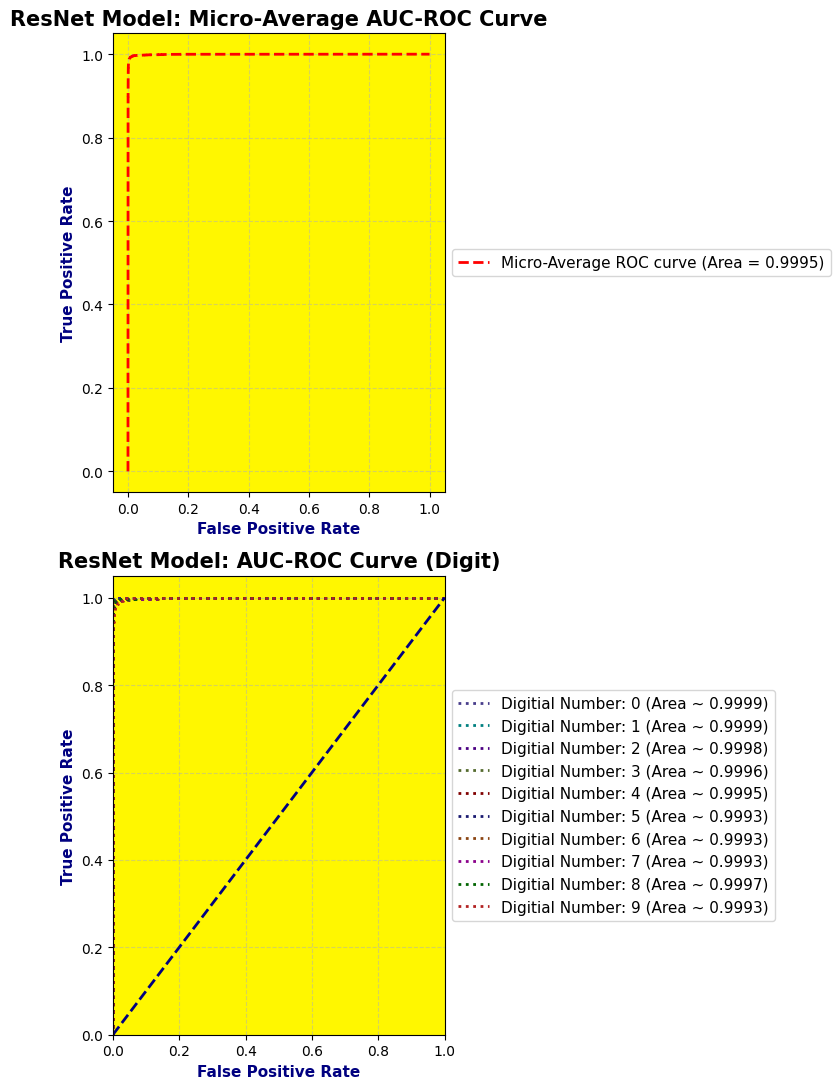

 
 
                                    Timestamp: 2024-10-05 01:42:49.068570


In [ ]:
plots_AUC_ROC_curve(model_type="ResNet")

In [ ]:
def plot_F1_score(*, model_type: str):
    """
    Plot F1 Score for the Specified Model Type(s).

    Description:
    ------------
    This function calculates and plots the F1 score for the specified model type. The model type can be
    'DNN', 'ConvNet', or 'ResNet'. Based on the model type, it retrieves the model's predictions on the
    test dataset, computes the F1 score for each digit (0-9), as well as the precision-recall curve for the
    micro-average F1 score, and visualizes the results. Higher the area under the precision-recall curve, the
    better the model's performance...

    Function Parameters:
    --------------------
    model_type : str
        The type of model for which to plot the F1 score.
        - 'DNN': Deep Neural Network.
        - 'ConvNet': Convolutional Neural Network.
        - 'ResNet': Residual Network.

    Notes:
    ------
    - This function uses a keyword-only argument (`model_type`), and it is required.
    """

    # Check if the model_type is a string
    if not isinstance(model_type, str):
        raise TypeError('"model_type" must be a string.')

    # Convert the model type to uppercase
    model_type = model_type.upper()
    # DNN Model
    if model_type == "DNN":
        # Title for the plot
        title = "DNN Model"
        # Predict the test images using the DNN model
        y_pred = dnn_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Model name
        model_name = "DNN"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    # ConvNet Model
    elif model_type == "CONVNET":
        # Title for the plot
        title = "ConvNet Model"
        # Predict the test images using the ConvNet model
        y_pred = convnet_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Model name
        model_name = "ConvNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")
    # ResNet Model
    elif model_type == "RESNET":
        # Title for the plot
        title = "ResNet Model"
        # Predict the test images using the ResNet model
        y_pred = resnet_model.predict(test_images_rgb)
        # Assign the true labels
        y_true = test_labels
        # Model name
        model_name = "ResNet"
        # Print the model type
        print(f"\n                                    Model: {model_name}\n\n")

    # else:
    #     None

    # Convert predicted probabilities to binary predictions (0 or 1)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate F1 Score for each digit (0-9)
    f1_scores = []
    for i in range(10):
        y_true_digit = y_true[:, i]
        y_pred_digit = y_pred_binary[:, i]
        f1 = f1_score(y_true_digit, y_pred_digit, average='weighted')
        f1_scores.append(f1)

    # Calculate Precision-Recall for Micro-Average F1 Score
    precision, recall, _ = precision_recall_curve(y_true.ravel(), y_pred.ravel())

    # Plot the Micro-Average Precision-Recall Curve and Digital Number-wise F1 Scores
    plt.figure(figsize=(8, 11))

    # Subplot for Micro-Average Precision-Recall Curve
    plt.subplot(2, 1, 1)
    # Plot the Micro-Average Precision-Recall Curve
    plt.plot(recall, precision, color='red', linestyle='-', linewidth=2, label=f'Micro-Average Precision-Recall Curve')
    # X-axis Label
    plt.xlim([0.0, 1.0])
    # Y-axis Label
    plt.ylim([0.0, 1.0])
    # X-axis Label
    plt.xlabel('Recall', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('Precision', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'               {title}: Micro-Average Precision-Recall Curve', fontsize=15, color="black", fontweight="bold")
    # Grid
    plt.grid(True, linestyle="--", alpha=0.5)
    # Background Color
    plt.gca().set_facecolor("#FFF700")
    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Different colors for each digit's F1 score
    different_colors = ['darkslateblue', 'teal', 'indigo', 'darkolivegreen', 'maroon', 'midnightblue', 'saddlebrown', 'darkmagenta', 'darkgreen', 'firebrick']

    # Subplot for F1 Scores for each digital number (Bar Graph)
    plt.subplot(2, 1, 2)
    for i in range(10):
        plt.bar(i, f1_scores[i], label=f'Digital Number: {i} (F1 Score ~ {f1_scores[i]:.4f})', color=different_colors[i])
    # X-axis Label
    plt.xlabel('Digital Number', fontsize=11, color="navy", fontweight="bold")
    # Y-axis Label
    plt.ylabel('F1 Score', fontsize=11, color="navy", fontweight="bold")
    # Title
    plt.title(f'{title}: F1 Score by Digital Number', fontsize=15, color="black", fontweight="bold")
    # Grid
    plt.grid(True, linestyle="--", alpha=0.5)
    # Background Color
    plt.gca().set_facecolor("#FFF700")
    # Legend
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

    # Adjust the Subplots
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    print(" ")
    # Show the Plot
    plt.show()

    # Timestamp
    timestamp = datetime.now()
    print(f" ")
    print(f" ")
    print("                                    Timestamp:", timestamp)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

                                    Model: DNN


 


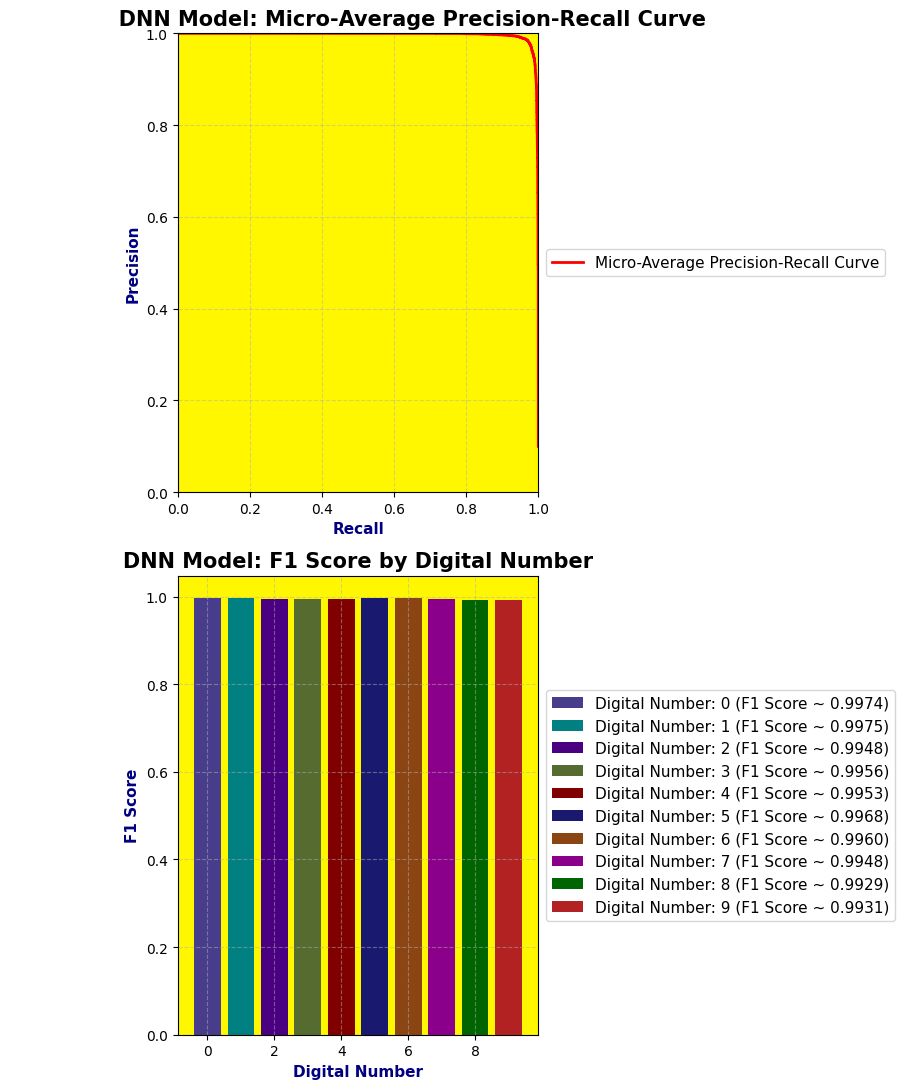

 
 
                                    Timestamp: 2024-10-05 01:44:38.447587


In [ ]:
plot_F1_score(model_type="DNN")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

                                    Model: ConvNet


 


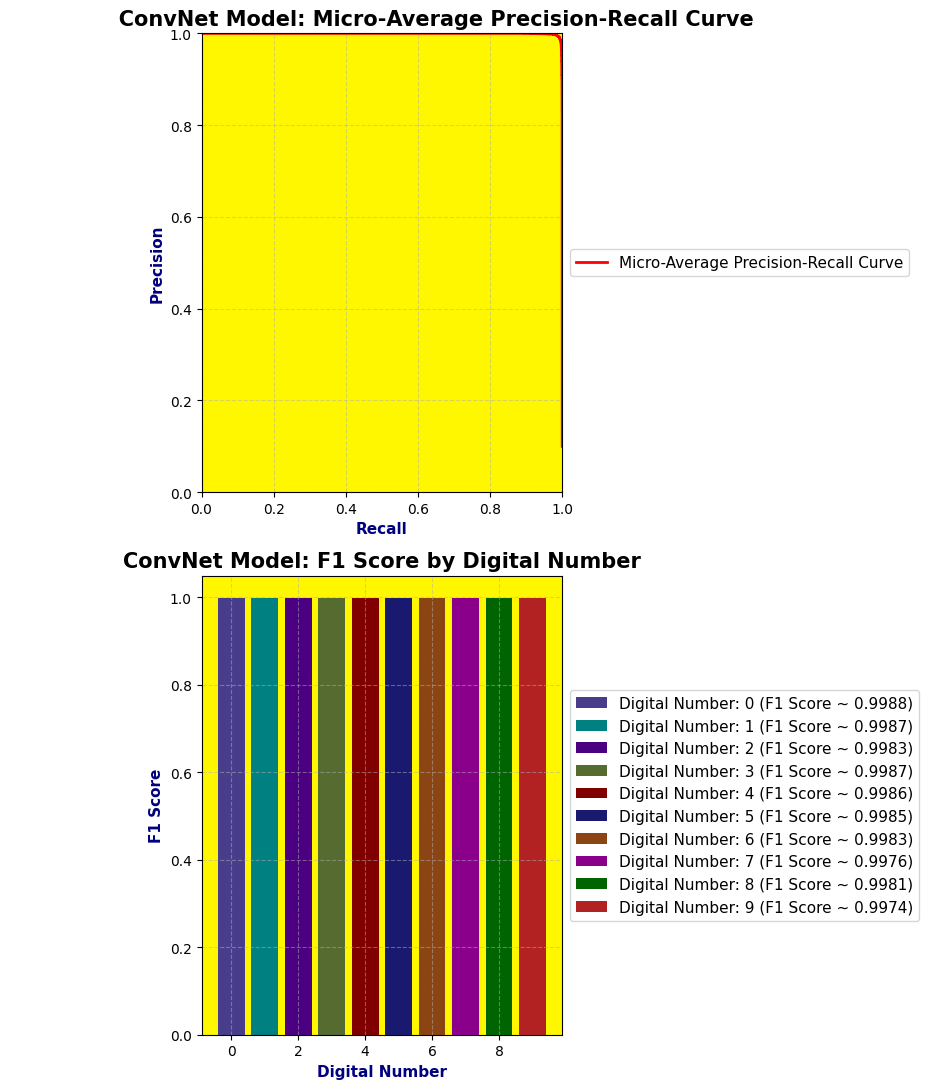

 
 
                                    Timestamp: 2024-10-05 01:44:45.717960


In [ ]:
plot_F1_score(model_type="ConvNet")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

                                    Model: ResNet


 


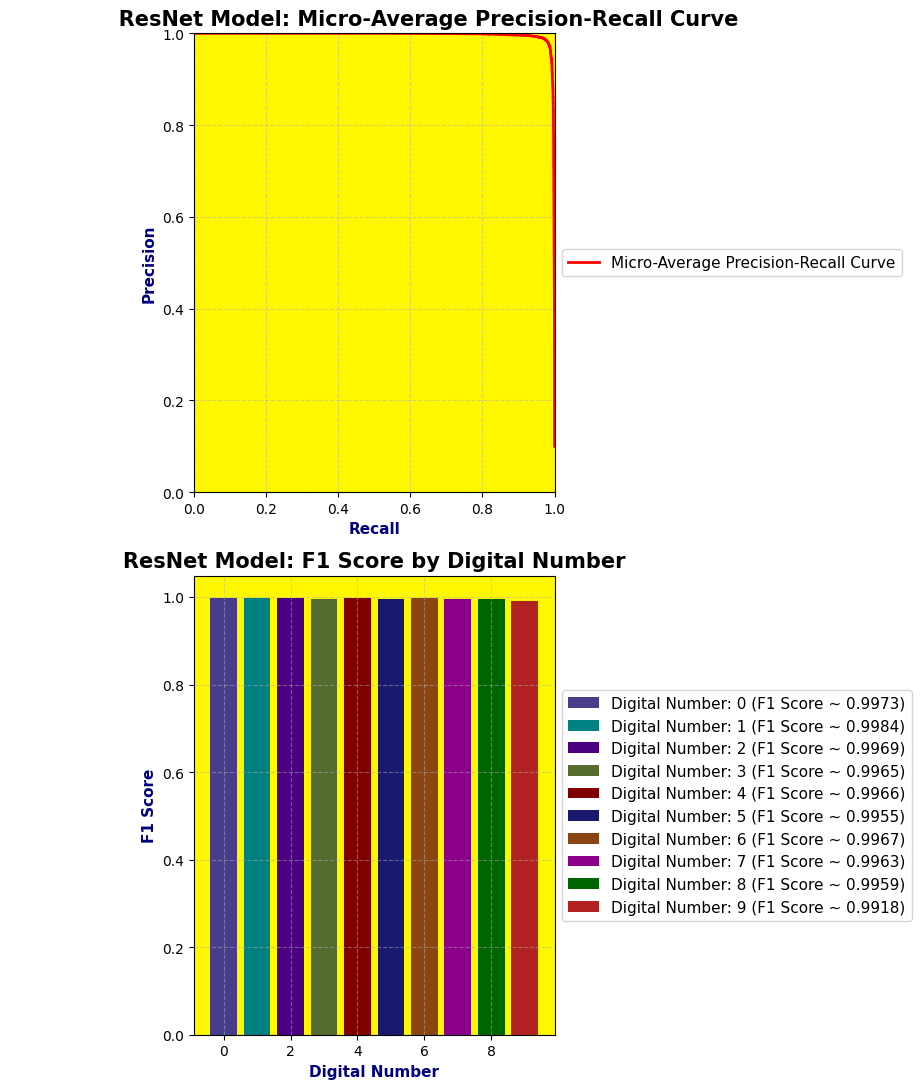

 
 
                                    Timestamp: 2024-10-05 01:45:22.930711


In [ ]:
plot_F1_score(model_type="ResNet")